# analysis the pooling structure
- given a graph, plotting its pooled structure under different methods

In [1]:
import torch

In [5]:
from main import SetSeed,TUDataset,random_split,get_args
from models import Model
from torch_geometric.data import DataLoader

SetSeed(11)
args = get_args()

path = '/usr/data/gzy/GraphPool/ex_cmp/data/'+args.dataset
dataset = TUDataset(path, name=args.dataset, use_node_attr=True)
args.num_classes = dataset.num_classes
args.num_features = dataset.num_features
num_training = int(len(dataset) * 0.8)
num_val = int(len(dataset) * 0.1)
num_test = len(dataset) - (num_training + num_val)
training_set, validation_set, test_set = random_split(dataset, [num_training, num_val, num_test])

train_loader = DataLoader(training_set, batch_size=args.batch_size, shuffle=True)
val_loader = DataLoader(validation_set, batch_size=args.batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=args.batch_size, shuffle=False)

In [6]:
model = Model(args).to(args.device)
model.load_state_dict(torch.load('./results/NCI1/2020.12.07-10:38:12mXyVA/64.pth'))

<All keys matched successfully>

In [7]:
for i, data in enumerate(train_loader):
    break

data = data.to(args.device)
out = model(data)

In [203]:
import networkx as nx
import numpy as np

In [264]:
G=nx.from_edgelist(model.edges[0].cpu().numpy().T)
Dis=dict(nx.all_pairs_shortest_path_length(G,cutoff=3))
N=model.edges[0].cpu().numpy().max()+1
edge,D=[],[]

In [265]:
for i in Dis.keys():
    for j in Dis[i].keys():
#         D[i,j]=Dis[i][j]
        edge.append([i,j])
        D.append(Dis[i][j])

edge=np.array(edge).T
D=np.array(D)
mask=~(edge[0]==edge[1])
edge=edge[:,mask]
D=D[mask]

tensor(0, device='cuda:0')


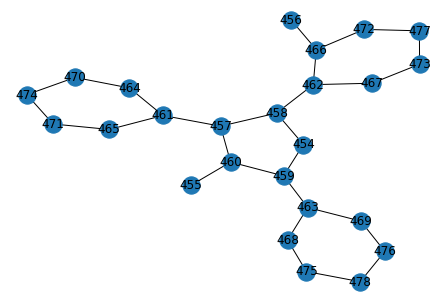

In [180]:
GraphIdx=16
level=0
edgemask=(data.batch[model.edges[level][0]]==GraphIdx)
edge=model.edges[level][:,edgemask]

G=nx.from_edgelist(edge.cpu().numpy().T)
pos=nx.kamada_kawai_layout(G)
nx.draw(G,pos)
labels = nx.draw_networkx_labels(G,pos)
print(data.y[GraphIdx])

In [188]:
import time

In [191]:
t0=time.time()
for i in range(10000):
    dict(nx.all_pairs_shortest_path_length(G,cutoff=3))
t1=time.time()
print(t1-t0)

4.545619010925293


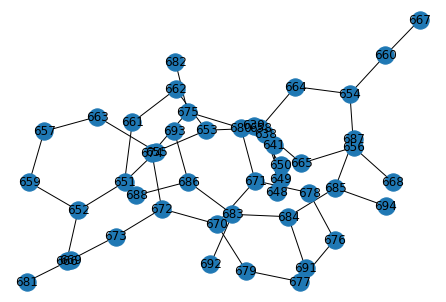

In [159]:
GraphIdx=22
level=1
edgemask=(data.batch[model.edges[level][0]]==GraphIdx)
edge=model.edges[level][:,edgemask]

G=nx.from_edgelist(edge.cpu().numpy().T)
pos=nx.kamada_kawai_layout(G)
nx.draw(G,pos)
labels = nx.draw_networkx_labels(G,pos)